<a href="https://colab.research.google.com/github/junxnone/examples/blob/master/einops/einops_usecase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
# !git clone https://github.com/arogozhnikov/einops.git

In [19]:
# !pip3 install einops

In [20]:
import numpy as np
from einops import rearrange, reduce, repeat
from PIL.Image import fromarray
from IPython import get_ipython

In [21]:
def display_np_arrays_as_images():
    def np_to_png(a):
        if 2 <= len(a.shape) <= 3:
            return fromarray(np.array(np.clip(a, 0, 1) * 255, dtype='uint8'))._repr_png_()
        else:
            return fromarray(np.zeros([1, 1], dtype='uint8'))._repr_png_()

    def np_to_text(obj, p, cycle):
        if len(obj.shape) < 2:
            print(repr(obj))
        if 2 <= len(obj.shape) <= 3:
            pass
        else:
            print('<array of shape {}>'.format(obj.shape))

    get_ipython().display_formatter.formatters['image/png'].for_type(np.ndarray, np_to_png)
    get_ipython().display_formatter.formatters['text/plain'].for_type(np.ndarray, np_to_text)


from IPython.display import display_html

_style_inline = """<style>
.einops-answer {
    color: transparent;
    padding: 5px 15px;
    background-color: #def;
}
.einops-answer:hover { color: blue; } 
</style>
"""


def guess(x):
    display_html(
        _style_inline
        + "<h4>Answer is: <span class='einops-answer'>{x}</span> (hover to see)</h4>".format(x=tuple(x)),
        raw=True)

In [22]:
display_np_arrays_as_images()
ims = np.load('./einops/docs/resources/test_images.npy', allow_pickle=False)


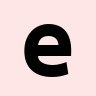

In [23]:
ims[0]

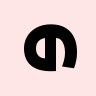

In [24]:
rearrange(ims[0], 'h w c -> w h c')

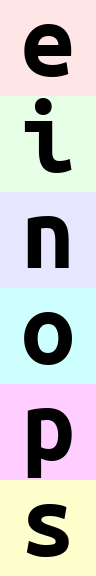

In [25]:
rearrange(ims, 'b h w c -> (b h) w c')

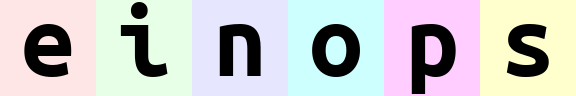

In [26]:
rearrange(ims, 'b h w c -> h (b w) c')

In [27]:
rearrange(ims, 'b h w c -> h (b w) c').shape

(96, 576, 3)

In [28]:
rearrange(ims, 'b h w c -> (b h w c)').shape

(165888,)

In [29]:
rearrange(ims, '(b1 b2) h w c -> b1 b2 h w c ', b1=2).shape

(2, 3, 96, 96, 3)

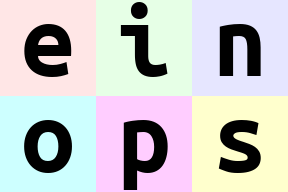

In [30]:
rearrange(ims, '(b1 b2) h w c -> (b1 h) (b2 w) c ', b1=2)

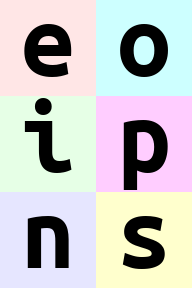

In [31]:
rearrange(ims, '(b1 b2) h w c -> (b2 h) (b1 w) c ', b1=2)

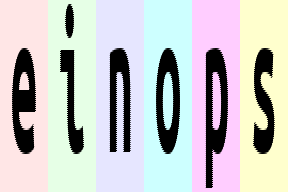

In [32]:
rearrange(ims, 'b h (w w2) c -> (h w2) (b w) c', w2=2)

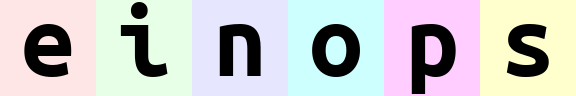

In [33]:
rearrange(ims, 'b h w c -> h (b w) c')

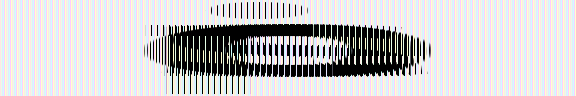

In [34]:
rearrange(ims, 'b h w c -> h (w b) c')

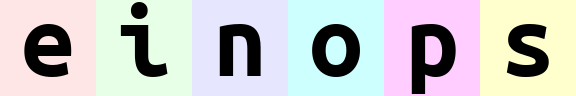

In [35]:
rearrange(ims, '(b1 b2) h w c -> h (b1 b2 w) c ', b1=2)

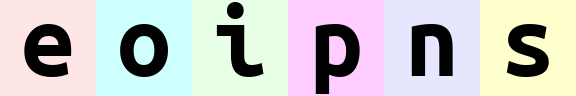

In [36]:
rearrange(ims, '(b1 b2) h w c -> h (b2 b1 w) c ', b1=2)

> 上操作先转为 2x3 的 batch 然后再转为 3x2 的 batch:  
2x3xHxWxC ==> 3xHx(2xW)xC ==> Hx(3x2xW)xC

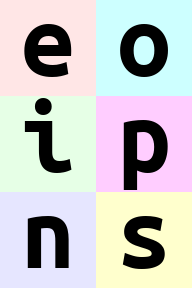

In [47]:
rearrange(ims, '(b1 b2) h w c -> (b2 h) (b1 w) c ', b1=2)

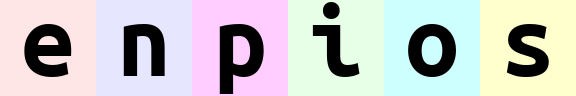

In [37]:
rearrange(ims, '(b1 b2) h w c -> h (b2 b1 w) c ', b1=3)

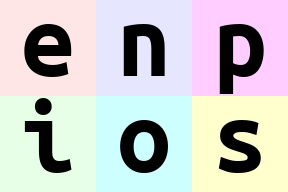

In [48]:
rearrange(ims, '(b1 b2) h w c -> (b2 h) (b1 w) c ', b1=3)

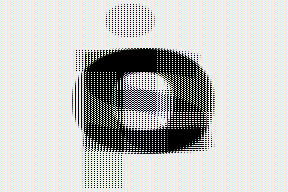

In [49]:
rearrange(ims, '(b1 b2) h w c -> (h b1) (w b2) c ', b1=2)

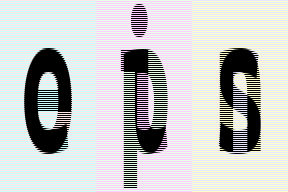

In [50]:
rearrange(ims, '(b1 b2) h w c -> (h b1) (b2 w) c', b1=2)

# reduce 使用

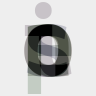

In [41]:
reduce(ims, 'b h w c -> h w c', 'mean')

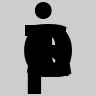

In [42]:
reduce(ims, 'b h w c -> h w', 'min')

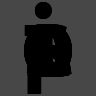

In [45]:
reduce(ims, 'b h w c -> h w', 'prod')

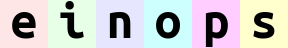

In [46]:
reduce(ims, 'b (h h2) (w w2) c -> h (b w) c', 'mean', h2=2, w2=2)

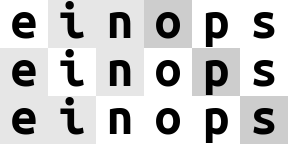

In [51]:
reduce(ims, 'b (h 2) (w 2) c -> (c h) (b w)', 'mean')

# repeat 使用

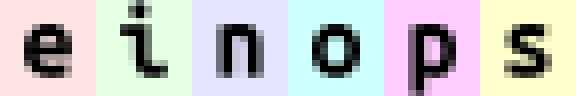

In [53]:
averaged = reduce(ims, 'b (h h2) (w w2) c -> b h w c', 'mean', h2=6, w2=8)
repeat(averaged, 'b h w c -> (h h2) (b w w2) c', h2=6, w2=8)